In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import numpy as np

import utils.windFarms as wfman
from utils.networks import GraphNeuralNet as GNN
from utils.graphNetHelpers import graph2inputs
from utils.testUtils import generalization_over_direction_speed

import torch

## Initialize windfarm

In [3]:
wind_farm_man = wfman.RandomSampleManager.load('../figure8farm')

## Load trained model

In [4]:
save_path = '../pib_saves/pib8'

gnn_load = GNN.load(save_path, device='cpu')
gnn_load.eval()

GraphNeuralNet(
  (layers): ModuleList(
    (0): GraphNetworkBlock(
      (encoders): ModuleList(
        (0): MultiLayerPerceptron(
          (layers): ModuleList(
            (0): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): Linear(in_features=8, out_features=256, bias=True)
            (2): Linear(in_features=256, out_features=256, bias=True)
            (3): Linear(in_features=256, out_features=128, bias=True)
            (4): Linear(in_features=128, out_features=50, bias=True)
          )
        )
        (1): MultiLayerPerceptron(
          (layers): ModuleList(
            (0): BatchNorm1d(54, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): Linear(in_features=54, out_features=256, bias=True)
            (2): Linear(in_features=256, out_features=256, bias=True)
            (3): Linear(in_features=256, out_features=128, bias=True)
            (4): Linear(in_features=128, out_features=50, bias=True

In [ ]:
#wind_farm_man.sample_wind_farm(5)
wind_farm_man.update_wind_farm_graph(wind_speed=6.0, wind_direction=180)
wind_farm_man.visualize_wind_farm(dpi=300)

Number of turbines : 5
Number of directions : 360
Fixed speed : 8.0
Fixed directions : [60, 120, 180]
[Wind Direction] Estimate powers : 0.9513154029846191 sec
[Wind Direction] Compute error : 1.0013651847839355 sec
[Wind Direction] test score : 2.210178852081299
[wind direction = 60] : 0.059221744537353516 sec
test score : 0.021727321669459343
[wind direction = 120] : 0.05820012092590332 sec
test score : 0.025802144780755043
[wind direction = 180] : 0.057798147201538086 sec
test score : 0.01204944308847189


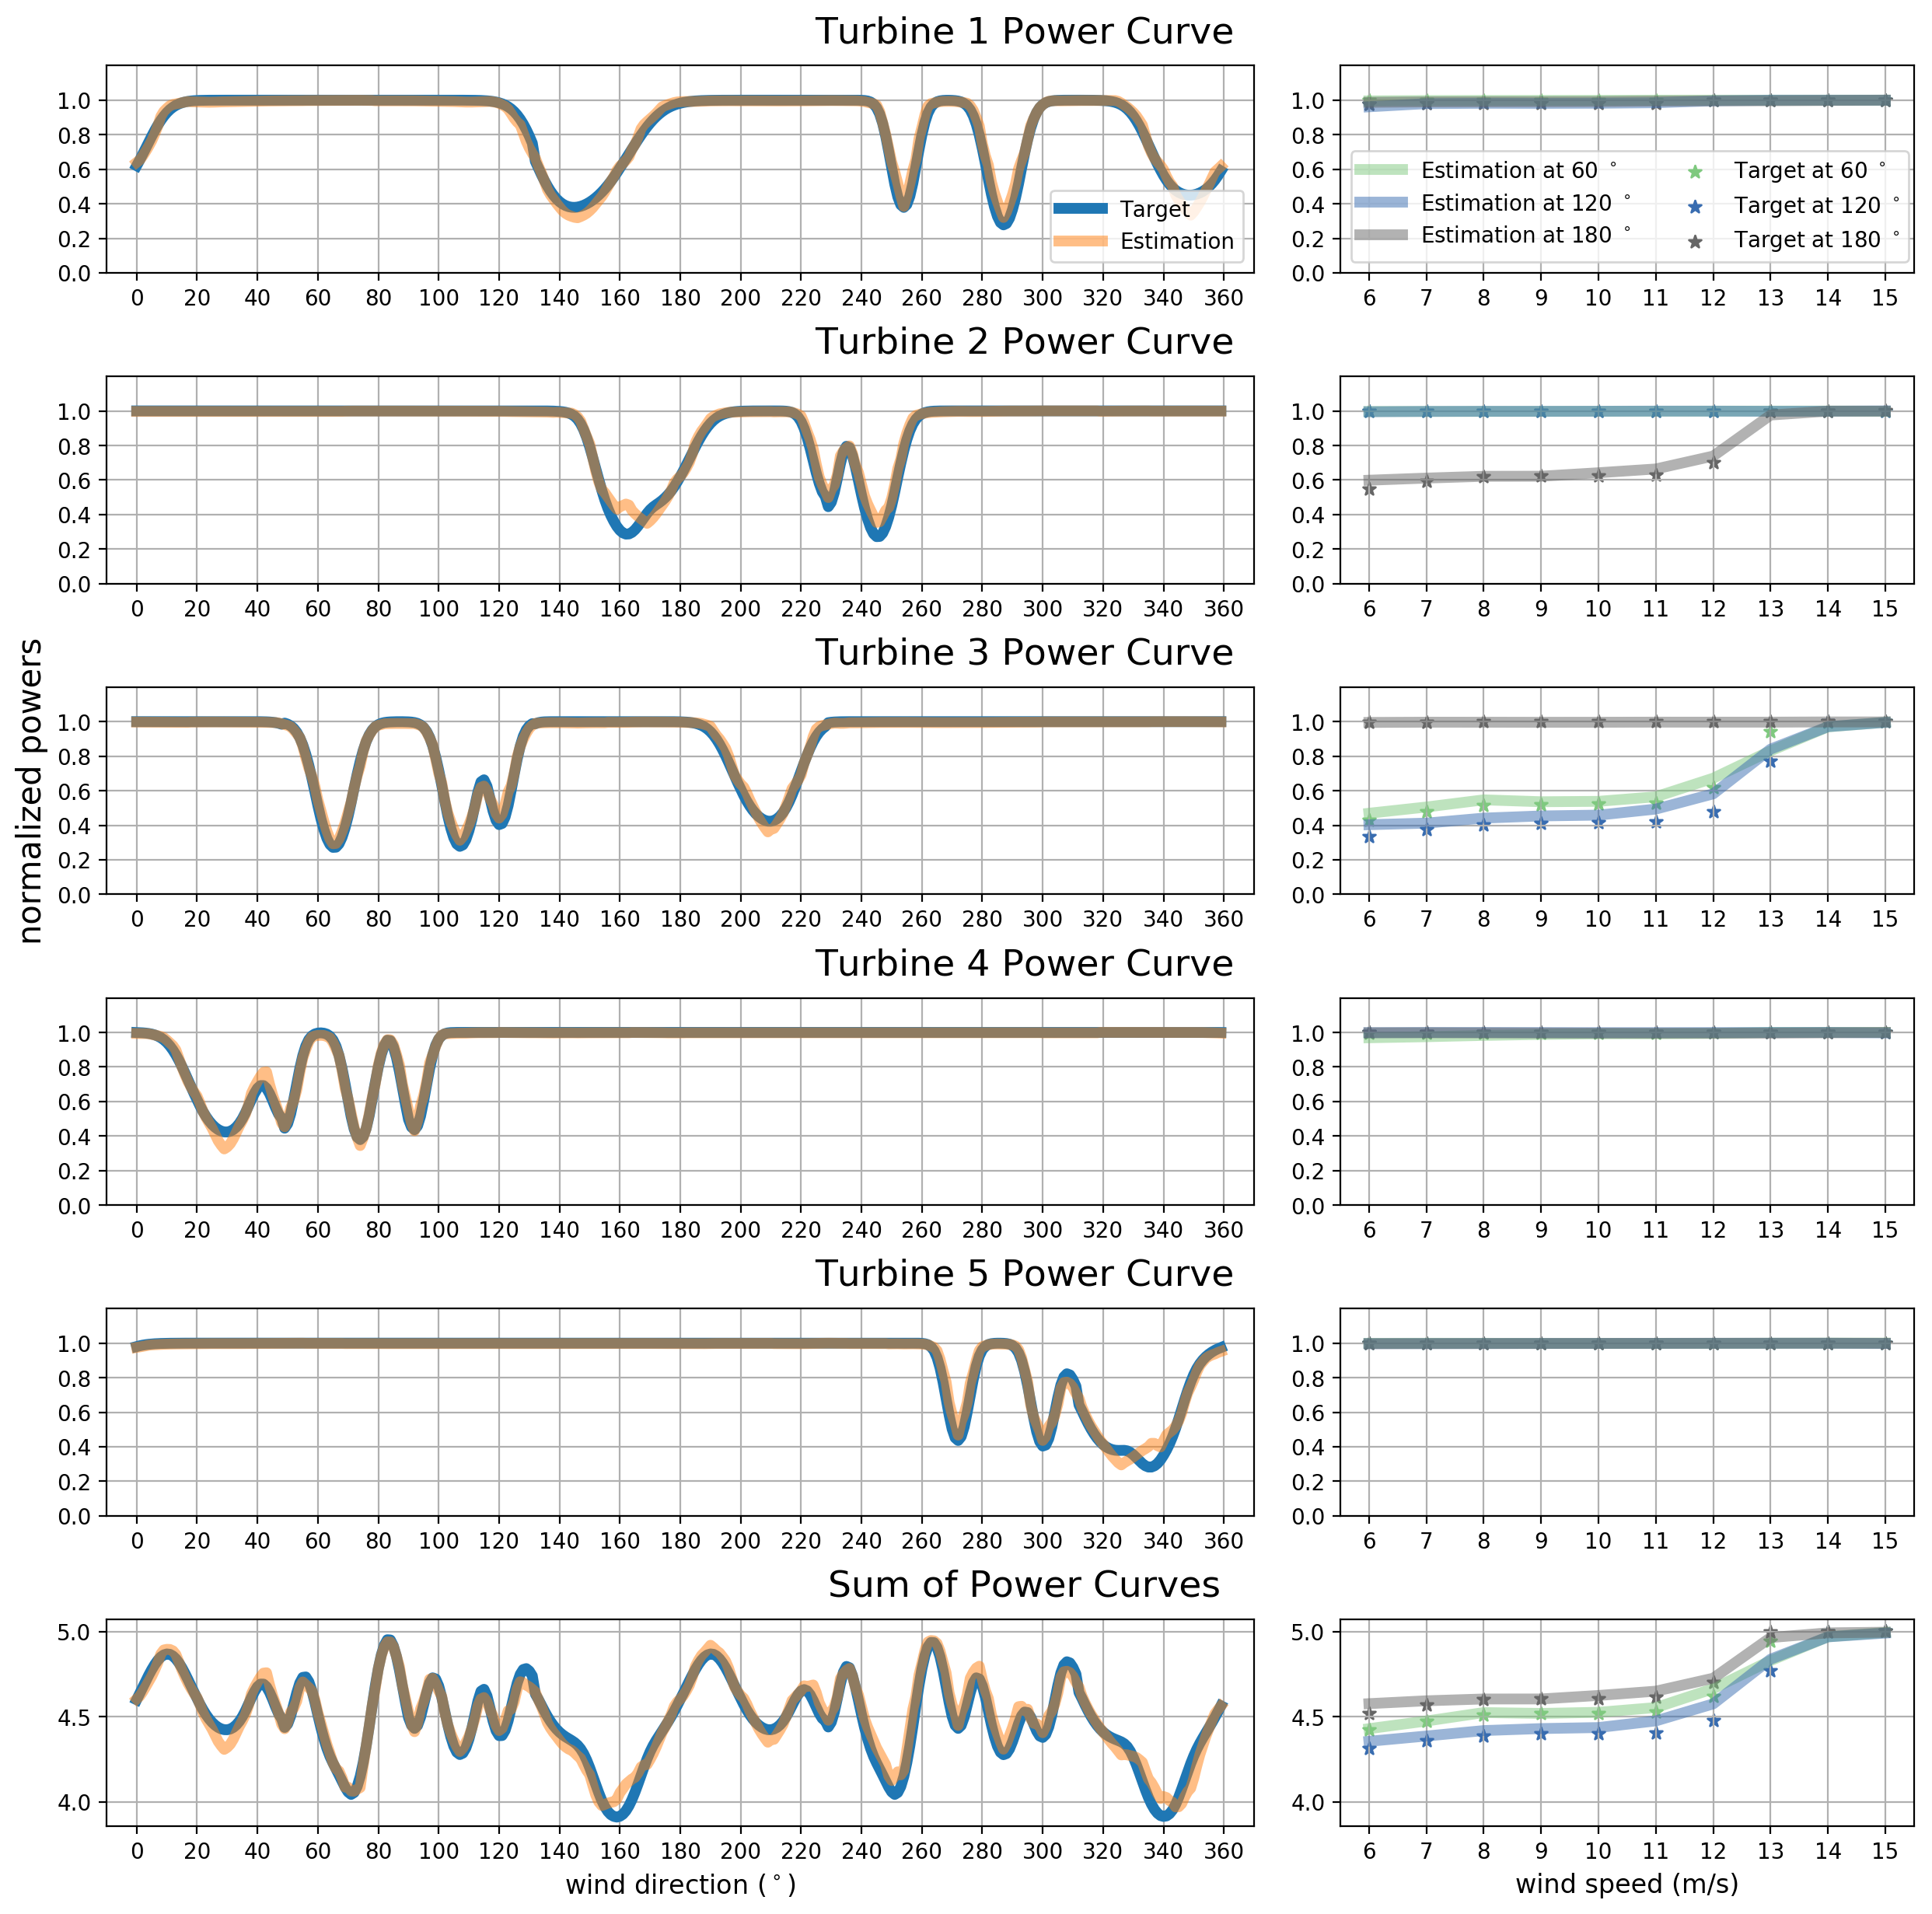

In [11]:
fig = generalization_over_direction_speed(gnn_load, 
                                          wind_farm_man,
                                          fix_farm=False, 
                                          normalize_total=False,
                                          loss='MAPE')

In [5]:
test_x, test_y = wind_farm_man.observe(use_speed=True)

In [7]:
rmse = gnn_load.test([test_x, test_x], [test_y, test_y], loss='RMSE')
mape = gnn_load.test([test_x, test_x], [test_y, test_y], loss='MAPE')

In [8]:
rmse, mape

(array(0.00329338, dtype=float32), array(0.24030975, dtype=float32))

In [ ]:
wind_farm_man.sample_wind_farm(wind_farm_man.num_turbine)

In [ ]:
wind_farm_man.x_coords, wind_farm_man.y_coords

In [ ]:
x,y = wind_farm_man.observe()

In [ ]:
wind_farm_man.visualize_wind_farm()

In [ ]:
for n in x.nodes:
    print(x.nodes[n], y.nodes[n])

In [ ]:
test_x, test_y = wind_farm_man.observe(use_speed=True)

In [9]:
y_preds, y_targets = gnn_load._prepare_inputs([test_x, test_x], [test_y, test_y])

In [10]:
y_preds

tensor([[1.0011],
        [0.9982],
        [0.9963],
        [0.9994],
        [1.0002],
        [1.0011],
        [0.9982],
        [0.9963],
        [0.9994],
        [1.0002]], grad_fn=<StackBackward>)

In [ ]:
y_targets

In [ ]:
l2_loss = torch.pow((y_preds-y_targets), 2).mean()
loss = torch.sqrt(l2_loss)

In [ ]:
loss

In [ ]:
loss = 100 * torch.abs((y_targets - y_preds) / y_targets).mean()

In [ ]:
loss

In [ ]:
wind_farm_man.wind_speed

In [ ]:
(1.0 - 0.9988)/1.0 * 100